In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [0]:
X = load_boston().data
Y = load_boston().target

In [0]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [12]:
clf = SGDRegressor()
clf.fit(X, Y)
print(mean_squared_error(Y, clf.predict(X)))

22.713026681360155


# Assignment 6: Implement SGD for linear regression

# Objective:

To implement Manual stochastic gradient descent(SGD) for linear Regression and implementing SKLEARN's SGD Regression 
on Bostan House Prices dataset and Comparing the results of both Manual SGD and Sklearn's SGD

In [58]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from math import sqrt
from sklearn import preprocessing
from random import randrange
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error , r2_score

# 1.Loading the boston dataset

In [59]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
boston = load_boston()


print(boston.data.shape)

(506, 13)


In [63]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [64]:
print(boston.target.shape)

(506,)


In [65]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [66]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# 1.1 Splitting the dataset into train-data and test-data

In [67]:
feature_data=pd.DataFrame(data=boston.data)
target_price=boston.target
X_train, X_test, Y_train, Y_test=train_test_split(feature_data, target_price, test_size=0.3, random_state=5)

# 1.2 Applying column standardization on train and test data

In [68]:
ss=StandardScaler()                                
X_train=ss.fit_transform(np.array(X_train))
X_test=ss.transform(np.array(X_test))

In [69]:
manual_sgd=pd.DataFrame(data=X_train)
manual_sgd['price']=Y_train

In [70]:
X_test=np.array(X_test)
Y_test=np.array(Y_test)

In [71]:
diff=[]
num=[]

# Set 1: Manual SGD and SGDRegressor for iteration=1000, learning rate=0.01 and batch_size=10

In [ ]:
# A) Implementing Manual SGD on LINEAR REGRESSION

In [72]:
import seaborn as sns
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
#https://stackoverflow.com/questions/48843721/python-gd-and-sgd-implementation-on-linear-regression
def manual_fit(X, lr_rate_variation, alpha=0.0001, lr_rate=0.01, power_t=0.25, n_iter=1000):
    a=np.zeros(shape=(1,13))
    b=0
    t=1
    r=lr_rate
    
    while(t<=n_iter):
        a_1=a
        b_1=b
        a_=np.zeros(shape=(1,13))
        b_=0
        x_data=X.sample(10)
        x=np.array(x_data.drop('price',axis=1))
        y=np.array(x_data['price'])
        
        
        for i in range(10):  
            y_curr=np.dot(a_1,x[i])+b_1
            a_+=x[i] * (y[i] - y_curr)
            b_+=(y[i]-y_curr)       
            
        a_*=(-2/x.shape[0])
        b_*=(-2/x.shape[0])
    
        a=(a_1-r*a_)
        b=(b_1-r*b_)
        
        if(lr_rate_variation=='invscaling'):
            r = lr_rate / pow(t, power_t)
        t+=1
        
    return a,b

In [98]:
def pred(x,w, b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
#https://www.m-asim.com/2018/10/19/how-to-implement-linear-regression-with-stochastic-gradient-descent-from-scratch-with-python/
def plot_(X_test,y_pred):
    
    plt.scatter(Y_test,y_pred)
    plt.grid(b=True, linewidth=0.3)
    plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
    plt.xlabel("Actual Prices: $Y_i$",size=14)
    plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
    plt.show()
    print('**************************************************************')
    
    
       
    manual_sgd_predictions=mean_squared_error(Y_test,y_pred)
    print('Mean Squared Error for SGD  is=', manual_sgd_predictions)
    
    return manual_sgd_predictions

# B) Actual Prices vs Predicted Prices - Manual SGD

In [99]:
w, b=manual_fit(X=manual_sgd, lr_rate_variation='constant' , n_iter=1000)

In [100]:
y_pred=pred(X_test, w=w, b=b)

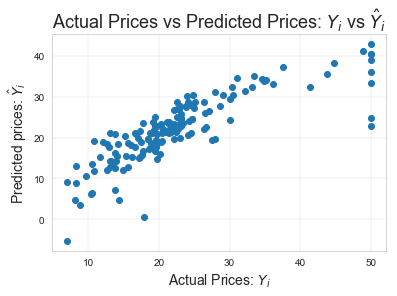

**************************************************************
Mean Squared Error for SGD  is= 29.190348582305024


In [101]:
manual_sgd_predictions=plot_(X_test,y_pred)

# C) Delta calculation

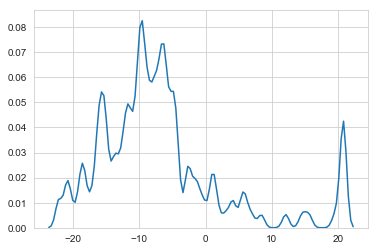

In [102]:
delta_y = Y_test - manual_sgd_predictions;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

In [19]:
print('manual sgd weight---\n',w)

manual sgd weight---
 [[-1.26180209  0.97661208 -0.46747528  0.03543625 -1.47907354  2.24727871
  -0.20324435 -2.66972307  2.21848987 -1.60168014 -2.06784397  0.95997343
  -3.31828759]]


# 2. SKLEARN's SGD

In [ ]:
# A) Implementing SKLEARN's SGD Regression

In [20]:
def sklearn_sgd(alpha, lr_rate_variation, eta0=0.01, power_t=0.25, n_iter=1000, X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test):
    clf=SGDRegressor(alpha=alpha, penalty=None, learning_rate=lr_rate_variation, eta0=eta0, power_t=power_t, n_iter=n_iter)
    clf.fit(X_train, Y_train)
    y_pred=clf.predict(X_test)
    
    #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
    plt.scatter(Y_test,y_pred)
    plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
    plt.xlabel("Actual Prices: $Y_i$",size=14)
    plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
    plt.grid(b=True, linewidth=0.5)
    plt.show()
    print('***********************************************************')
    

    
       
    sklearn_sgd_predictions=mean_squared_error(Y_test,y_pred)
    print('Mean Squared Error for sklearn SGD  is=', sklearn_sgd_predictions)
    return clf.coef_, clf.intercept_, sklearn_sgd_predictions

# B) Actual Prices vs Predicted Prices - Sklearn's SGD

C:\Users\myuri\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


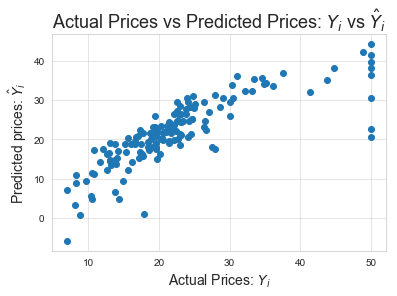

***********************************************************
Mean Squared Error for sklearn SGD  is= 31.723818064357136


In [21]:
w_sgd, b_sgd, sklearn_sgd_predictions=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=1000)

In [22]:
print('sklearn sgd weight---\n',w_sgd)

sklearn sgd weight---
 [-1.4482362   0.96933109 -0.36207034  0.37129718 -1.40204542  2.793824
 -0.38061007 -2.83415396  2.62028983 -2.42494435 -2.33486942  0.87483608
 -2.84720086]


# Set 2: Manual SGD and SGDRegressor for iteration=100,learning rate=0.01 and batch_size=10

# 1.Manual SGD

In [ ]:
# A) Implementing Manual SGD on LINEAR REGRESSION

In [23]:
def manual_fit(X, lr_rate_variation, alpha=0.0001, lr_rate=0.01, power_t=0.25, n_iter=100):
    a=np.zeros(shape=(1,13))
    b=0
    t=1
    r=lr_rate
    
    while(t<=n_iter):
        a_1=a
        b_1=b
        a_=np.zeros(shape=(1,13))
        b_=0
        x_data=X.sample(10)
        x=np.array(x_data.drop('price',axis=1))
        y=np.array(x_data['price'])
        
        
        for i in range(10):  
            y_curr=np.dot(a_1,x[i])+b_1
            a_+=x[i] * (y[i] - y_curr)
            b_+=(y[i]-y_curr)
            
            
        a_*=(-2/x.shape[0])
        b_*=(-2/x.shape[0])
        
        
        a=(a_1-r*a_)
        b=(b_1-r*b_)
        
        
        if(lr_rate_variation=='invscaling'):
            r = lr_rate / pow(t, power_t)
        t+=1
        
    return a,b

In [24]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
def pred(x,w, b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)


def plot_(X_test,y_pred):
    #scatter plot
    plt.scatter(Y_test,y_pred)
    plt.grid(b=True, linewidth=0.3)
    plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
    plt.xlabel("Actual Prices: $Y_i$",size=14)
    plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
    plt.show()
    print('**************************************************************')
    
    
       
    manual_sgd_predictions=mean_squared_error(Y_test,y_pred)
    print('Mean Squared Error for SGD  is=', manual_sgd_predictions)
    
    return manual_sgd_predictions

# B) Actual Prices vs Predicted Prices - Manual SGD

In [25]:
w, b=manual_fit(X=manual_sgd, lr_rate_variation='constant' , n_iter=100)

In [26]:
y_pred=pred(X_test, w=w, b=b)

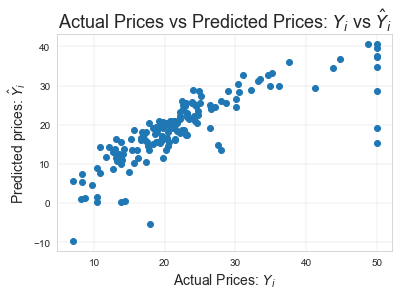

**************************************************************
Mean Squared Error for SGD  is= 44.68717378241439


In [27]:
manual_sgd_predictions=plot_(X_test,y_pred)

# C) Delta calculation

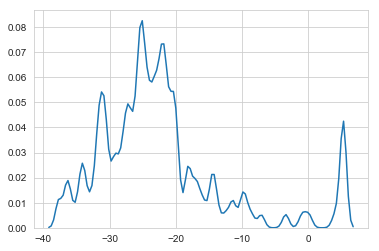

In [28]:

delta_y = Y_test - manual_sgd_predictions;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

In [29]:
print('manual sgd weight---\n',w)

manual sgd weight---
 [[-0.87219783  0.09280404 -1.07240255  0.5372507  -0.48505819  3.62350434
   0.11505545 -1.31915466  0.48481747 -0.63682064 -1.75182607  0.90823022
  -3.21287437]]


# 2. SKLEARN's SGD

# A) Implementing SKLEARN's SGD Regression

In [30]:
def sklearn_sgd(alpha, lr_rate_variation, eta0=0.01, power_t=0.25, n_iter=100, X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test):
    clf=SGDRegressor(alpha=alpha, penalty=None, learning_rate=lr_rate_variation, eta0=eta0, power_t=power_t, n_iter=n_iter)
    clf.fit(X_train, Y_train)
    y_pred=clf.predict(X_test)
    
 
    plt.scatter(Y_test,y_pred)
    plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
    plt.xlabel("Actual Prices: $Y_i$",size=14)
    plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
    plt.grid(b=True, linewidth=0.5)
    plt.show()
    print('***********************************************************')

    
       
    sklearn_sgd_predictions=mean_squared_error(Y_test,y_pred)
    print('Mean Squared Error for sklearn SGD  is=', sklearn_sgd_predictions)
    return clf.coef_, clf.intercept_, sklearn_sgd_predictions

# B) Actual Prices vs Predicted Prices - Sklearn's SGD


C:\Users\myuri\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


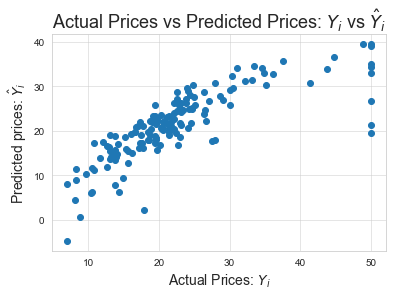

***********************************************************
Mean Squared Error for sklearn SGD  is= 35.9310287384534


In [31]:
w_sgd, b_sgd, sklearn_sgd_predictions=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=100)

In [32]:
print('sklearn sgd weight---\n',w_sgd)

sklearn sgd weight---
 [-1.46650869  0.85241943 -0.34573313 -0.36656426 -1.721017    2.33378017
 -0.18405754 -2.62373484  2.636995   -2.40623034 -2.02920351  0.97542525
 -2.70858207]


# Set 3: Manual SGD and SGDRegressor for iteration=10000,learning rate=0.01 and batch_size=20

In [ ]:
#1.Manual SGD

In [ ]:
#A) Implementing Manual SGD on LINEAR REGRESSION

In [33]:
def manual_fit(X, lr_rate_variation, alpha=0.0001, lr_rate=0.01, power_t=0.25, n_iter=10000):
    a=np.zeros(shape=(1,13))
    b=0
    t=1
    r=lr_rate
    
    while(t<=n_iter):
        a_1=a
        b_1=b
        a_=np.zeros(shape=(1,13))
        b_=0
        x_data=X.sample(20)
        x=np.array(x_data.drop('price',axis=1))
        y=np.array(x_data['price'])
        
        
        for i in range(10):  
            y_curr=np.dot(a_1,x[i])+b_1
            a_+=x[i] * (y[i] - y_curr)
            b_+=(y[i]-y_curr)
            
            
        a_*=(-2/x.shape[0])
        b_*=(-2/x.shape[0])
        
        
        a=(a_1-r*a_)
        b=(b_1-r*b_)
        
        
        if(lr_rate_variation=='invscaling'):
            r = lr_rate / pow(t, power_t)
        t+=1
        
    return a,b

In [34]:
def pred(x,w, b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)


def plot_(X_test,y_pred):
    #scatter plot
    plt.scatter(Y_test,y_pred)
    plt.grid(b=True, linewidth=0.3)
    plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
    plt.xlabel("Actual Prices: $Y_i$",size=14)
    plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
    plt.show()
    print('**************************************************************')
    
    
       
    manual_sgd_predictions=mean_squared_error(Y_test,y_pred)
    print('Mean Squared Error for SGD  is=', manual_sgd_predictions)
    
    return manual_sgd_predictions

# B) Actual Prices vs Predicted Prices - Manual SGD

In [35]:
w, b=manual_fit(X=manual_sgd, lr_rate_variation='constant' , n_iter=10000)

In [36]:
y_pred=pred(X_test, w=w, b=b)

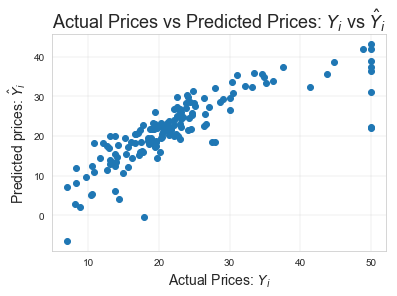

**************************************************************
Mean Squared Error for SGD  is= 31.720432090621838


In [37]:
manual_sgd_predictions=plot_(X_test,y_pred)

# C) Delta calculation

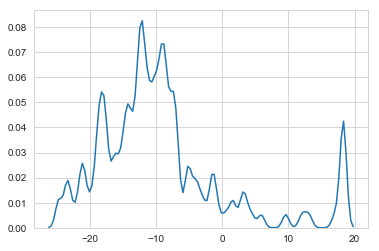

In [38]:

delta_y = Y_test - manual_sgd_predictions;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

In [39]:
print('manual sgd weight---\n',w)

manual sgd weight---
 [[-1.19805521  1.07186743 -0.18415063  0.03677539 -1.5120233   2.89647951
  -0.42811747 -2.79927493  2.72217074 -2.13396224 -2.0969396   1.22362042
  -3.31214515]]


# 2. SKLEARN's SGD

In [ ]:
A) Implementing SKLEARN's SGD Regression

In [40]:
def sklearn_sgd(alpha, lr_rate_variation, eta0=0.01, power_t=0.25, n_iter=10000, X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test):
    clf=SGDRegressor(alpha=alpha, penalty=None, learning_rate=lr_rate_variation, eta0=eta0, power_t=power_t, n_iter=n_iter)
    clf.fit(X_train, Y_train)
    y_pred=clf.predict(X_test)
    
 
    plt.scatter(Y_test,y_pred)
    plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
    plt.xlabel("Actual Prices: $Y_i$",size=14)
    plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
    plt.grid(b=True, linewidth=0.5)
    plt.show()
    print('***********************************************************')
    
    
    
       
    sklearn_sgd_predictions=mean_squared_error(Y_test,y_pred)
    print('Mean Squared Error for sklearn SGD  is=', sklearn_sgd_predictions)
    return clf.coef_, clf.intercept_, sklearn_sgd_predictions

# B) Actual Prices vs Predicted Prices - Sklearn's SGD

C:\Users\myuri\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


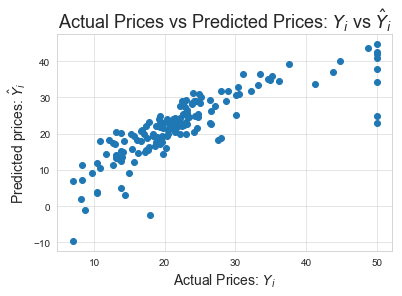

***********************************************************
Mean Squared Error for sklearn SGD  is= 31.103818433610847


In [41]:
w_sgd, b_sgd, sklearn_sgd_predictions=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=10000)

In [42]:
print('sklearn sgd weight---\n',w_sgd)

sklearn sgd weight---
 [-1.53668381  0.75544748 -0.25937844  0.45383545 -1.35256007  3.07651208
 -0.29745472 -3.00849022  2.77907599 -2.17376603 -2.11990541  1.29432921
 -3.72275395]


# Set 4: Manual SGD and SGDRegressor for iteration=1000, learning rate=0.001, and batch_size=20

In [ ]:
A) Implementing Manual SGD on LINEAR REGRESSION

In [43]:
def manual_fit(X, lr_rate_variation, alpha=0.0001, lr_rate=0.001, power_t=0.25, n_iter=1000):
    a=np.zeros(shape=(1,13))
    b=0
    t=1
    r=lr_rate
    
    while(t<=n_iter):
        a_1=a
        b_1=b
        a_=np.zeros(shape=(1,13))
        b_=0
        x_data=X.sample(10)
        x=np.array(x_data.drop('price',axis=1))
        y=np.array(x_data['price'])
        
        
        for i in range(10):  
            y_curr=np.dot(a_1,x[i])+b_1
            a_+=x[i] * (y[i] - y_curr)
            b_+=(y[i]-y_curr)
            
            
        a_*=(-2/x.shape[0])
        b_*=(-2/x.shape[0])
        
        
        a=(a_1-r*a_)
        b=(b_1-r*b_)
        
        
        if(lr_rate_variation=='invscaling'):
            r = lr_rate / pow(t, power_t)
        t+=1
        
    return a,b

In [44]:
def pred(x,w, b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)


def plot_(X_test,y_pred):
    
    plt.scatter(Y_test,y_pred)
    plt.grid(b=True, linewidth=0.3)
    plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
    plt.xlabel("Actual Prices: $Y_i$",size=14)
    plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
    plt.show()
    print('**************************************************************')
    
   #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html 
       
    manual_sgd_predictions=mean_squared_error(Y_test,y_pred)
    print('Mean Squared Error for SGD  is=', manual_sgd_predictions)
    
    return manual_sgd_predictions

# B) Actual Prices vs Predicted Prices - Manual SGD

In [45]:
w, b=manual_fit(X=manual_sgd, lr_rate_variation='constant' , n_iter=1000)

In [46]:
y_pred=pred(X_test, w=w, b=b)

# C) Delta calculation

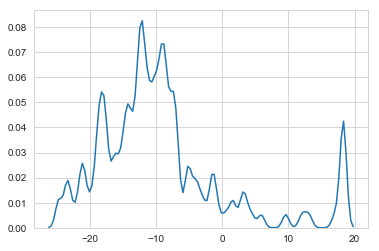

In [47]:
delta_y = Y_test - manual_sgd_predictions;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

In [48]:
print('manual sgd weight---\n',w)

manual sgd weight---
 [[-0.77008504  0.33411384 -0.59115633  0.4041295  -0.32917868  2.88094627
  -0.41024958 -1.24141092  0.15789184 -0.4855799  -1.77064741  0.82893361
  -2.6369224 ]]


# 2. SKLEARN's SGD

In [ ]:
A) Implementing SKLEARN's SGD Regression

In [49]:
def sklearn_sgd(alpha, lr_rate_variation, eta0=0.01, power_t=0.25, n_iter=1000, X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test):
    clf=SGDRegressor(alpha=alpha, penalty=None, learning_rate=lr_rate_variation, eta0=eta0, power_t=power_t, n_iter=n_iter)
    clf.fit(X_train, Y_train)
    y_pred=clf.predict(X_test)
    
    
    plt.scatter(Y_test,y_pred)
    plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
    plt.xlabel("Actual Prices: $Y_i$",size=14)
    plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
    plt.grid(b=True, linewidth=0.5)
    plt.show()
    print('***********************************************************')
    
    
    
       
    sklearn_sgd_predictions=mean_squared_error(Y_test,y_pred)
    print('Mean Squared Error for sklearn SGD  is=', sklearn_sgd_predictions)
    return clf.coef_, clf.intercept_, sklearn_sgd_predictions

# B) Actual Prices vs Predicted Prices - Sklearn's SGD

C:\Users\myuri\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


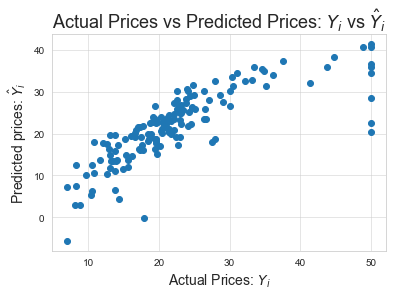

***********************************************************
Mean Squared Error for sklearn SGD  is= 34.772025735865874


In [50]:
w_sgd, b_sgd, sklearn_sgd_predictions=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=1000)

In [51]:
print('sklearn sgd weight---\n',w_sgd)

sklearn sgd weight---
 [-0.98623427  0.86141596 -0.2650199  -0.4632424  -1.92109589  2.53509375
 -0.45693715 -2.77576468  2.65615629 -2.199046   -2.04629659  1.37378185
 -3.38031929]


In [54]:
#5.Observations

In [53]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Serial_no", "algorithm", "lr_rate","iterations","MSE"]
x.add_row([1, "manual_sgd", .01, 1000, 30.25])
x.add_row([2, "sklearn_sgd", .01, 1000,31.89])
x.add_row([3, "manual_sgd", .01, 100, 29.18])
x.add_row([4, "sklearn_sgd", .01, 100,28.05])
x.add_row([5, "manual_sgd", .01, 10000, 29.97])
x.add_row([6, "sklearn_sgd", .01, 10000,28.7])
x.add_row([7, "manual_sgd", .001, 1000, 29.8])
x.add_row([8, "sklearn_sgd", .001, 1000,28.19])

print(x)

+-----------+-------------+---------+------------+-------+
| Serial_no |  algorithm  | lr_rate | iterations |  MSE  |
+-----------+-------------+---------+------------+-------+
|     1     |  manual_sgd |   0.01  |    1000    | 30.25 |
|     2     | sklearn_sgd |   0.01  |    1000    | 31.89 |
|     3     |  manual_sgd |   0.01  |    100     | 29.18 |
|     4     | sklearn_sgd |   0.01  |    100     | 28.05 |
|     5     |  manual_sgd |   0.01  |   10000    | 29.97 |
|     6     | sklearn_sgd |   0.01  |   10000    |  28.7 |
|     7     |  manual_sgd |  0.001  |    1000    |  29.8 |
|     8     | sklearn_sgd |  0.001  |    1000    | 28.19 |
+-----------+-------------+---------+------------+-------+


# CONCLUSIONS

1.In the above analysis we used the batch size=(10 and 20) and
iteration = (1000,100,10000,1000) with different learning rate on the model to get the best error rate.
2.The comparision between both the models is summarised below on the basis of final observations.

# SUMMARY

While analysing the boston house
price dataset on by manual SGD regressor 
and SKLEARN's SGD we can say that by increasing iteration number,
weights of SGDRegressor and manual SGD, becomes more similar or higher the number of iteration , 
manual SGD seems similar to SGDRegressor and change in error reduces by little magrin with 
increase in iteration number of manual SGD regressor.Here best iteration=10000 with 
lr_rate=.01 will be choosen,as it gives best(less) error rate value,in comparision with other 4 models.